# Playing Around With PyTorch
(skip down to the 'Prepping for Training Our Neural Net' section for the stuff for our project)

In [9]:
import torch
torch.Tensor(5, 3).uniform_(-1, 1)

tensor([[ 0.4095, -0.9486, -0.2529],
        [ 0.6006,  0.3186,  0.5724],
        [-0.2490,  0.6530, -0.4578],
        [ 0.9364, -0.0917, -0.4828],
        [-0.6808, -0.3927,  0.9962]])

In [11]:
y = torch.rand(5, 3)
x = torch.Tensor(5, 3).uniform_(-1, 1)

In [17]:
x

tensor([[-0.3893, -0.5908,  0.8698],
        [-0.4327,  0.3335, -0.0648],
        [ 0.6535,  0.1548, -0.9215],
        [ 0.2030,  0.5835,  0.1170],
        [-0.2586, -0.0737, -0.7168]])

In [12]:
print(x + y)

tensor([[-0.1324, -0.3940,  1.4943],
        [-0.3502,  0.9432,  0.8713],
        [ 1.5835,  1.0379, -0.0365],
        [ 0.2207,  1.1592,  0.6039],
        [ 0.4943,  0.1391,  0.0439]])


In [13]:
result = torch.Tensor(5, 3)
result

tensor([[ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000, -0.0000],
        [ 0.0000,  0.0000,  0.0000]])

In [14]:
torch.add(x, y, out=result)

tensor([[-0.1324, -0.3940,  1.4943],
        [-0.3502,  0.9432,  0.8713],
        [ 1.5835,  1.0379, -0.0365],
        [ 0.2207,  1.1592,  0.6039],
        [ 0.4943,  0.1391,  0.0439]])

In [15]:
result

tensor([[-0.1324, -0.3940,  1.4943],
        [-0.3502,  0.9432,  0.8713],
        [ 1.5835,  1.0379, -0.0365],
        [ 0.2207,  1.1592,  0.6039],
        [ 0.4943,  0.1391,  0.0439]])

In [16]:
print(x[:, 1])

tensor([-0.5908,  0.3335,  0.1548,  0.5835, -0.0737])


In [18]:
y = torch.randn(5, 10, 15)
print(y.size())
print(y.view(-1, 15).size())

torch.Size([5, 10, 15])
torch.Size([50, 15])


In [26]:
import autograd
from torch.autograd import Variable

x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]
w = Variable(torch.Tensor([1.0]),  requires_grad=True)

In [32]:
from sklearn import metrics

In [38]:
class LinearRegressionModel(nn.Module):

    def __init__(self, input_dim, output_dim):

        super(LinearRegressionModel, self).__init__() 
        # Calling Super Class's constructor
        self.linear = nn.Linear(input_dim, output_dim)
        # nn.linear is defined in nn.Module

    def forward(self, x):
        # Here the forward pass is simply a linear function

        out = self.linear(x)
        return out

input_dim = 1
output_dim = 1

In [39]:
model = LinearRegressionModel(input_dim,output_dim)

In [42]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt

In [43]:
np.random.seed(42)
pts = 50

In [44]:
x_vals = np.random.rand(50)
x_train = np.asarray(x_vals,dtype=np.float32).reshape(-1,1)
m = 1
alpha = np.random.rand(1)
beta = np.random.rand(1)
y_correct = np.asarray([2*i+m for i in x_vals], dtype=np.float32).reshape(-1,1)

In [47]:
class LinearRegressionModel(nn.Module):

    def __init__(self, input_dim, output_dim):

        super(LinearRegressionModel, self).__init__() 
        # Calling Super Class's constructor
        self.linear = nn.Linear(input_dim, output_dim)
        # nn.linear is defined in nn.Module

    def forward(self, x):
        # Here the forward pass is simply a linear function

        out = self.linear(x)
        return out

input_dim = 1
output_dim = 1

In [53]:
model = LinearRegressionModel(input_dim,output_dim)# create our model just as we do in Scikit-Learn / C / C++//

criterion = nn.MSELoss()# Mean Squared Loss
l_rate = 0.01
optimiser = torch.optim.SGD(model.parameters(), lr = l_rate) #Stochastic Gradient Descent

epochs = 2000


In [54]:
for epoch in range(epochs):

    epoch +=1
    inputs = Variable(torch.from_numpy(x_train))
    labels = Variable(torch.from_numpy(y_correct))

    #clear grads
    optimiser.zero_grad()
    #forward to get predicted values
    outputs = model.forward(inputs)
    loss = criterion(outputs, labels)
    loss.backward()# back props
    optimiser.step()# update the parameters
    print('epoch {}, loss {}'.format(epoch,loss.item()))

epoch 1, loss 1.3962124586105347
epoch 2, loss 1.3338197469711304
epoch 3, loss 1.2744059562683105
epoch 4, loss 1.217828392982483
epoch 5, loss 1.1639509201049805
epoch 6, loss 1.112644076347351
epoch 7, loss 1.0637848377227783
epoch 8, loss 1.0172559022903442
epoch 9, loss 0.972945511341095
epoch 10, loss 0.9307473301887512
epoch 11, loss 0.8905601501464844
epoch 12, loss 0.8522876501083374
epoch 13, loss 0.8158380389213562
epoch 14, loss 0.7811239361763
epoch 15, loss 0.7480621337890625
epoch 16, loss 0.7165734767913818
epoch 17, loss 0.6865826845169067
epoch 18, loss 0.6580178737640381
epoch 19, loss 0.6308107376098633
epoch 20, loss 0.6048962473869324
epoch 21, loss 0.580212414264679
epoch 22, loss 0.5567002892494202
epoch 23, loss 0.5343037843704224
epoch 24, loss 0.5129693746566772
epoch 25, loss 0.49264615774154663
epoch 26, loss 0.4732857346534729
epoch 27, loss 0.45484212040901184
epoch 28, loss 0.4372711777687073
epoch 29, loss 0.42053112387657166
epoch 30, loss 0.4045822620

epoch 467, loss 0.028548870235681534
epoch 468, loss 0.028471941128373146
epoch 469, loss 0.02839522436261177
epoch 470, loss 0.028318705037236214
epoch 471, loss 0.02824239805340767
epoch 472, loss 0.028166305273771286
epoch 473, loss 0.028090404346585274
epoch 474, loss 0.028014710173010826
epoch 475, loss 0.02793923392891884
epoch 476, loss 0.027863940224051476
epoch 477, loss 0.02778884582221508
epoch 478, loss 0.027713965624570847
epoch 479, loss 0.027639292180538177
epoch 480, loss 0.027564821764826775
epoch 481, loss 0.027490537613630295
epoch 482, loss 0.027416467666625977
epoch 483, loss 0.027342593297362328
epoch 484, loss 0.0272689126431942
epoch 485, loss 0.02719542756676674
epoch 486, loss 0.027122151106595993
epoch 487, loss 0.027049072086811066
epoch 488, loss 0.026976177468895912
epoch 489, loss 0.026903487741947174
epoch 490, loss 0.026830997318029404
epoch 491, loss 0.026758691295981407
epoch 492, loss 0.026686592027544975
epoch 493, loss 0.026614679023623466
epoch 49

epoch 1012, loss 0.0065605174750089645
epoch 1013, loss 0.006542840972542763
epoch 1014, loss 0.006525208707898855
epoch 1015, loss 0.0065076276659965515
epoch 1016, loss 0.0064900885336101055
epoch 1017, loss 0.006472601089626551
epoch 1018, loss 0.006455160677433014
epoch 1019, loss 0.006437765900045633
epoch 1020, loss 0.006420420948415995
epoch 1021, loss 0.0064031207002699375
epoch 1022, loss 0.006385859567672014
epoch 1023, loss 0.006368653848767281
epoch 1024, loss 0.006351493764668703
epoch 1025, loss 0.006334374658763409
epoch 1026, loss 0.006317306775599718
epoch 1027, loss 0.006300283595919609
epoch 1028, loss 0.006283312104642391
epoch 1029, loss 0.0062663801945745945
epoch 1030, loss 0.0062494962476193905
epoch 1031, loss 0.0062326546758413315
epoch 1032, loss 0.006215862929821014
epoch 1033, loss 0.006199115887284279
epoch 1034, loss 0.006182410754263401
epoch 1035, loss 0.006165750324726105
epoch 1036, loss 0.006149138789623976
epoch 1037, loss 0.006132564041763544
epoch

epoch 1475, loss 0.001880956464447081
epoch 1476, loss 0.0018758896039798856
epoch 1477, loss 0.00187083485070616
epoch 1478, loss 0.0018657926702871919
epoch 1479, loss 0.001860763761214912
epoch 1480, loss 0.0018557497533038259
epoch 1481, loss 0.0018507478525862098
epoch 1482, loss 0.0018457621335983276
epoch 1483, loss 0.0018407906172797084
epoch 1484, loss 0.0018358302768319845
epoch 1485, loss 0.001830884488299489
epoch 1486, loss 0.0018259487114846706
epoch 1487, loss 0.0018210283014923334
epoch 1488, loss 0.001816122210584581
epoch 1489, loss 0.0018112281104549766
epoch 1490, loss 0.0018063463503494859
epoch 1491, loss 0.00180148018989712
epoch 1492, loss 0.0017966231098398566
epoch 1493, loss 0.00179178302641958
epoch 1494, loss 0.0017869573784992099
epoch 1495, loss 0.0017821418587118387
epoch 1496, loss 0.0017773399595171213
epoch 1497, loss 0.0017725520301610231
epoch 1498, loss 0.0017677739961072803
epoch 1499, loss 0.0017630115617066622
epoch 1500, loss 0.0017582598375156

epoch 1955, loss 0.0005151019431650639
epoch 1956, loss 0.0005137145053595304
epoch 1957, loss 0.0005123288137838244
epoch 1958, loss 0.000510948826558888
epoch 1959, loss 0.0005095714004710317
epoch 1960, loss 0.0005081992712803185
epoch 1961, loss 0.0005068295286037028
epoch 1962, loss 0.0005054634530097246
epoch 1963, loss 0.0005041005206294358
epoch 1964, loss 0.0005027423612773418
epoch 1965, loss 0.0005013876361772418
epoch 1966, loss 0.0005000376841053367
epoch 1967, loss 0.0004986888961866498
epoch 1968, loss 0.0004973448230884969
epoch 1969, loss 0.0004960052901878953
epoch 1970, loss 0.0004946692497469485
epoch 1971, loss 0.0004933367017656565
epoch 1972, loss 0.0004920075880363584
epoch 1973, loss 0.0004906809772364795
epoch 1974, loss 0.0004893578006885946
epoch 1975, loss 0.00048803980462253094
epoch 1976, loss 0.0004867242241743952
epoch 1977, loss 0.0004854134167544544
epoch 1978, loss 0.0004841043264605105
epoch 1979, loss 0.00048280006740242243
epoch 1980, loss 0.00048

In [58]:
x_vals_two = np.random.rand(50)
x_test = np.asarray(x_vals_two,dtype=np.float32).reshape(-1,1)

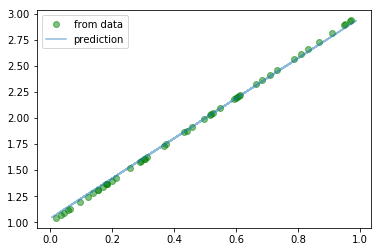

OrderedDict([('linear.weight', tensor([[1.9259]])), ('linear.bias', tensor([1.0354]))])


In [59]:
predicted = model.forward(Variable(torch.from_numpy(x_test))).data.numpy()

plt.plot(x_train, y_correct, 'go', label = 'from data', alpha = .5)
plt.plot(x_test, predicted, label = 'prediction', alpha = 0.5)
plt.legend()
plt.show()
print(model.state_dict())

In [1]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt

In [43]:
np.random.seed(42)
pts = 50

# Beginning of Training Our Neural Net

In [279]:
import numpy as np
import pandas as pd
y_vals = pd.read_csv('training_data_y.csv')
x_vals_original = pd.read_csv('training_data_x.csv')
x_vals_original.columns = ['R1', 'G1', 'B1', 'W1', 'R2', 'G2', 'B2', 'W2', 'R3', 'G3', 'B3', 'W3']
def getNewDF_X(originalDF):
    new_temps = [x for x in range(-10, 10, 1)]
    for unit in range(-10, 10, 1):
        new_temps[unit] = originalDF[['R1', 'G1', 'B1', 'R2', 'G2', 'B2', 'R3', 'G3', 'B3']].iloc[:] + unit
        new_temps[unit]['W1'] = originalDF['W1']
        new_temps[unit]['W2'] = originalDF['W2']
        new_temps[unit]['W3'] = originalDF['W3']
    returnVal = pd.concat(new_temps)
    return returnVal
def getNewDF_Y(originalDF):
    new_temps = [x for x in range(-10, 10, 1)]
    for unit in range(-10, 10, 1):
        new_temps[unit] = originalDF
    returnVal = pd.concat(new_temps)
    return returnVal
total_x_train = getNewDF_X(x_vals_original) / 100
total_y_train = getNewDF_Y(y_vals) / 100
x_train = np.asarray(total_x_train,dtype=np.float32)
y_train = np.asarray(total_y_train,dtype=np.float32)
class LinearRegressionModel(nn.Module):

    def __init__(self, input_dim, output_dim):

        super(LinearRegressionModel, self).__init__() 
        # Calling Super Class's constructor
        self.linear = nn.Linear(input_dim, output_dim)
        # nn.linear is defined in nn.Module

    def forward(self, x):
        # Here the forward pass is simply a linear function

        out = self.linear(x)
#         print('FROM NN MODEL', out)
        return out

input_dim =12
output_dim = 9
model = LinearRegressionModel(input_dim,output_dim)# create our model just as we do in Scikit-Learn / C / C++//

criterion = nn.MSELoss()# Mean Squared Loss
l_rate = 0.01
optimiser = torch.optim.SGD(model.parameters(), lr = l_rate) #Stochastic Gradient Descent

epochs = 1000

In [281]:
for epoch in range(epochs):

    epoch +=1
    inputs = Variable(torch.from_numpy(x_train))
    labels = Variable(torch.from_numpy(y_train))
    #clear grads
    optimiser.zero_grad()
    #forward to get predicted values
    outputs = model.forward(inputs)
#     print('OUTPUTS', outputs)
    loss = criterion(outputs, labels)
    loss.backward()# back props
    optimiser.step()# update the parameters
    print('epoch {}, loss {}'.format(epoch,loss.item()))

epoch 1, loss 0.34285563230514526
epoch 2, loss 0.34270456433296204
epoch 3, loss 0.3425542116165161
epoch 4, loss 0.3424045741558075
epoch 5, loss 0.3422556519508362
epoch 6, loss 0.3421074151992798
epoch 7, loss 0.3419598639011383
epoch 8, loss 0.34181302785873413
epoch 9, loss 0.3416668474674225
epoch 10, loss 0.34152138233184814
epoch 11, loss 0.34137657284736633
epoch 12, loss 0.34123244881629944
epoch 13, loss 0.3410889804363251
epoch 14, loss 0.34094616770744324
epoch 15, loss 0.3408040404319763
epoch 16, loss 0.34066256880760193
epoch 17, loss 0.34052175283432007
epoch 18, loss 0.34038159251213074
epoch 19, loss 0.34024208784103394
epoch 20, loss 0.3401032090187073
epoch 21, loss 0.33996495604515076
epoch 22, loss 0.33982735872268677
epoch 23, loss 0.3396904170513153
epoch 24, loss 0.3395540714263916
epoch 25, loss 0.3394183814525604
epoch 26, loss 0.339283287525177
epoch 27, loss 0.3391488194465637
epoch 28, loss 0.3390149772167206
epoch 29, loss 0.3388817310333252
epoch 30, l

In [282]:
x_test = x_train

In [283]:
optimiser.zero_grad()
model.forward(Variable(torch.from_numpy(x_train)))

tensor([[ 1.6185,  0.1320,  1.1511,  ...,  2.1826,  0.1534,  1.3042],
        [ 1.4255,  0.2476,  0.6382,  ...,  1.5316, -0.0998,  0.8133],
        [ 1.4472,  0.1881,  0.7396,  ...,  1.5955, -0.0433,  0.7745],
        ...,
        [ 1.4189,  0.2473,  0.8793,  ...,  1.7750,  0.2766,  0.6839],
        [ 1.0031,  0.0008,  0.9912,  ...,  1.9850,  0.1302,  1.0784],
        [ 1.3614,  0.2505,  0.8639,  ...,  1.9278, -0.0217,  1.0728]],
       grad_fn=<ThAddmmBackward>)

In [274]:
predicted = model.forward(Variable(torch.from_numpy(x_train))).data.numpy()

FROM NN MODEL tensor([[ 1.7651,  0.2687,  1.1965,  ...,  2.2538,  0.1695,  1.1516],
        [ 1.2236,  0.1585,  0.7143,  ...,  1.3263, -0.0959,  0.9671],
        [ 1.3658,  0.1431,  0.7761,  ...,  1.4546, -0.0258,  0.9002],
        ...,
        [ 1.2262, -0.0732,  0.8062,  ...,  1.8092,  0.1843,  0.7729],
        [ 1.4475,  0.1131,  0.9861,  ...,  2.1092,  0.0885,  1.0294],
        [ 1.3805,  0.2015,  0.9726,  ...,  1.7870, -0.0711,  1.1654]],
       grad_fn=<ThAddmmBackward>)


In [275]:
predicted

array([[ 1.7651062 ,  0.26869342,  1.19649458, ...,  2.2537868 ,
         0.16953991,  1.15157449],
       [ 1.22360396,  0.15847936,  0.71428448, ...,  1.32633102,
        -0.09587058,  0.96705705],
       [ 1.36579847,  0.14312658,  0.77611721, ...,  1.45464242,
        -0.0258067 ,  0.90023416],
       ..., 
       [ 1.22621608, -0.07317173,  0.80624366, ...,  1.80920804,
         0.18431796,  0.77290231],
       [ 1.44747484,  0.11313137,  0.98610717, ...,  2.10917783,
         0.08852762,  1.02940178],
       [ 1.38048708,  0.2015153 ,  0.97257024, ...,  1.78699756,
        -0.07113671,  1.16543841]], dtype=float32)

In [208]:
len(total_x_train), len(total_y_train), len(x_test), len(predicted)

(300, 300, 300, 300)

In [284]:
total_y_train[0:3]

,H1,S1,B1,H2,S2,B2,H3,S3,B3
0,2.11,0.02,0.97,2.04,0.03,1.00,2.04,0.12,0.99
1,2.03,0.07,0.99,2.19,0.02,0.97,2.22,0.12,0.98
2,2.36,0.00,0.99,2.29,0.06,0.97,2.00,0.06,0.97


In [285]:
predicted[0:3]

array([[ 1.7651062 ,  0.26869342,  1.19649458,  1.87246168,  0.12725857,
         1.19638157,  2.2537868 ,  0.16953991,  1.15157449],
       [ 1.22360396,  0.15847936,  0.71428448,  1.12199712, -0.07637991,
         0.60650021,  1.32633102, -0.09587058,  0.96705705],
       [ 1.36579847,  0.14312658,  0.77611721,  1.15582585,  0.01450418,
         0.65290856,  1.45464242, -0.0258067 ,  0.90023416]], dtype=float32)

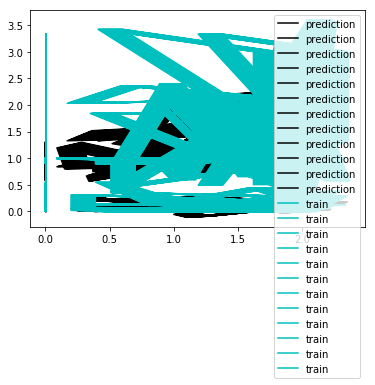

[[  1.61852765e+00   1.31968156e-01   1.15112996e+00 ...,   2.18263960e+00
    1.53411880e-01   1.30416191e+00]
 [  1.42552233e+00   2.47640461e-01   6.38175666e-01 ...,   1.53160918e+00
   -9.97729227e-02   8.13320816e-01]
 [  1.44718838e+00   1.88102633e-01   7.39619493e-01 ...,   1.59546208e+00
   -4.33092080e-02   7.74483740e-01]
 ..., 
 [  1.41889620e+00   2.47302130e-01   8.79337192e-01 ...,   1.77504480e+00
    2.76621699e-01   6.83904946e-01]
 [  1.00311661e+00   8.23825598e-04   9.91180122e-01 ...,   1.98501730e+00
    1.30195469e-01   1.07842982e+00]
 [  1.36136365e+00   2.50526279e-01   8.63906920e-01 ...,   1.92780209e+00
   -2.16695890e-02   1.07279134e+00]]


In [286]:
predicted = model.forward(Variable(torch.from_numpy(x_test))).data.numpy()

# plt.plot(total_x_train, total_y_train, 'go', label = 'from data', alpha = .5)

# plt.plot(x_test, predicted, label = 'prediction', alpha = 0.5)
plt.plot(total_x_train, predicted, 'k-', label = 'prediction')
plt.plot(total_x_train, total_y_train, 'c-', label='train')

plt.legend()
plt.show()
# print(model.state_dict())
print(predicted)

***

# Prepping for Training Our Neural Net

In [87]:
import pandas as pd

## Pass in Training Data as x, y ndarrays
- x values are the 3 RGB colors and their weights
- y values are the 3 HSB values for the lightbulbs

In [101]:
train_x = np.array([[26, 3, 4, 0.0556668, 0, 1, 2, 0.5, 50, 60, 70, 0.1], [100, 280, 38, 0.14801, 0, 1, 2, 0.5, 50, 60, 70, 0.1], [201, 111, 89, 0.478, 0, 1, 2, 0.5, 50, 60, 70, 0.1]])
train_data = pd.DataFrame(
data=train_x)
train_data.columns = ['R1', 'G1', 'B1', 'Weight1', 'R2', 'G2', 'B2', 'Weight2', 'R3', 'G3', 'B3', 'Weight3']
train_data.index.names = ['Scheme']
# these are the 'x values' for the training data
train_data

,R1,G1,B1,Weight1,R2,G2,B2,Weight2,R3,G3,B3,Weight3
Scheme,,,,,,,,,,,,
0,26.0,3.0,4.0,0.055667,0.0,1.0,2.0,0.5,50.0,60.0,70.0,0.1
1,100.0,280.0,38.0,0.148010,0.0,1.0,2.0,0.5,50.0,60.0,70.0,0.1
2,201.0,111.0,89.0,0.478000,0.0,1.0,2.0,0.5,50.0,60.0,70.0,0.1


In [102]:
# Then the output data would look something like this:
train_y = np.array([[5, 6, 7, 0, 1, 2, 50, 60, 70], [100, 280, 38, 0, 1, 2, 50, 60, 70], [201, 111, 89, 0, 1, 2, 50, 60, 70]])
train_data_y = pd.DataFrame(
data=train_y)
train_data_y.columns = ['H1', 'S1', 'B1', 'H2', 'S2', 'B2', 'H3', 'S3', 'B3',]
train_data_y.index.names = ['Scheme']
# these are the 'y values' for the training data
train_data_y

,H1,S1,B1,H2,S2,B2,H3,S3,B3
Scheme,,,,,,,,,
0,5,6,7,0,1,2,50,60,70
1,100,280,38,0,1,2,50,60,70
2,201,111,89,0,1,2,50,60,70


## Pass In Test Data

In [106]:
test = np.array([[26, 3, 4, 0.0556668, 0, 1, 2, 0.5, 50, 60, 70, 0.1]])
test_data = pd.DataFrame(
data=test)
test_data.columns = ['R1', 'G1', 'B1', 'Weight1', 'R2', 'G2', 'B2', 'Weight2', 'R3', 'G3', 'B3', 'Weight3']
test_data.index.names = ['KMeans On User Image']
test_data

,R1,G1,B1,Weight1,R2,G2,B2,Weight2,R3,G3,B3,Weight3
KMeans On User Image,,,,,,,,,,,,
0,26.0,3.0,4.0,0.055667,0.0,1.0,2.0,0.5,50.0,60.0,70.0,0.1


### Then the Neural Net guesses which values are best (using pytorch stuff from above) and spits back out something like this:

In [107]:
fake_prediction_values = np.array([[5, 6, 7, 0, 1, 2, 50, 60, 70]])
fake_prediction = pd.DataFrame(
data=fake_prediction_values)
fake_prediction.columns = ['H1', 'S1', 'B1', 'H2', 'S2', 'B2', 'H3', 'S3', 'B3',]
fake_prediction.index.names = ['Suggested Lights']
fake_prediction

,H1,S1,B1,H2,S2,B2,H3,S3,B3
Suggested Lights,,,,,,,,,
0,5,6,7,0,1,2,50,60,70
